# Following Karpathy's tutorial:
## https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1

## 1. Derivatives

### Definition of derivative
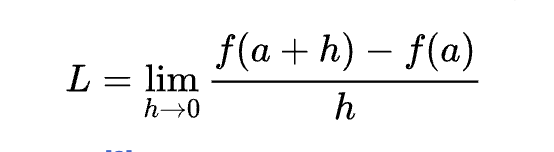

- slope of a function at a given point
-   how sensitive a function is to change in x values


In [18]:
# imports
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Parabola
def f(x):
    return 3*x**2 - 4*x + 5

In [9]:
f(3.0)

20.0

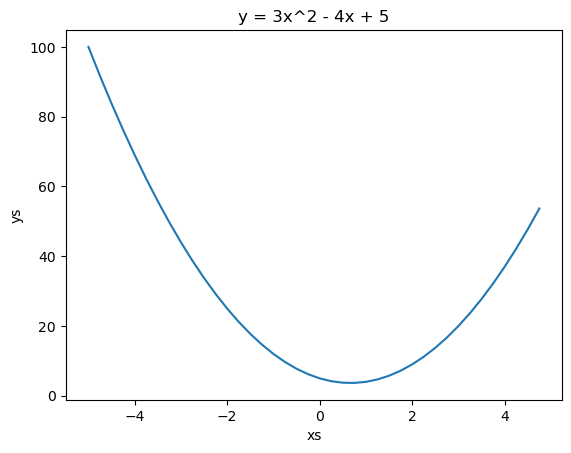

In [ ]:
# range of x values from -5 to 5 with a step of 0.25
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

plt.plot(xs, ys)
plt.title("y = 3x^2 - 4x + 5")
plt.xlabel("xs")
plt.ylabel('ys')
plt.show()

In [ ]:

h = 0.00001
x = 2/3 # parabolas minimum has a slope of 0
(f(x + h) - f(x)) / h # --> numerical approximation; rise / run

3.0000002482211127e-05

In [ ]:
# finding derivatives of d in respect to a,b,c
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
# in respect to a
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
d2 = (a+h)*b + c

print('d1', d1)
print('d2', d2) # less than 4 so slope is negative
print('slope', (d2-d1)/h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


In [46]:
# in respect to b
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
d2 = a*(b+h) + c

print('d1', d1)
print('d2', d2) # will be greater than 4 so slope is positive
print('slope', (d2-d1)/h)

d1 4.0
d2 4.00002
slope 2.0000000000131024


In [47]:
# in respect to c
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
d2 = a*b + (c+h)

print('d1', d1)
print('d2', d2) # higher by same amount changed meaning slope is 1
print('slope', (d2-d1)/h)

d1 4.0
d2 4.00001
slope 0.9999999999621422


## Value Object and Micrograd

In [83]:
class Value:

    def __init__(self, data, _children=(), _op=''): # children tuple for efficiency
        self.data = data
        self._prev = set(_children) 
        self._op = _op
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data=4.0)

In [91]:
# visualization code from tutorial

from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rabkdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label=f" data {n.data:.4f} ", shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [92]:
draw_dot(d)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH